In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.interpolate import RegularGridInterpolator

### Question 5

In [2]:
sigma = 0.25

In [5]:
Npointsx = 32 + 1 # To have 32 cells, I need 33 grid points so the boundaries are included
Npointsy = 32 + 1

x = np.linspace(-1, 1, Npointsx) #generate x and y arrays
y = np.linspace(-1, 1, Npointsy)

X, Y = np.meshgrid(x, y) # create a 2d mesh using the x and y points

In [7]:
source = (1/np.sqrt(2*np.pi*sigma))*np.exp(-((X**2 + Y**2)/2*sigma**2)) # The source function

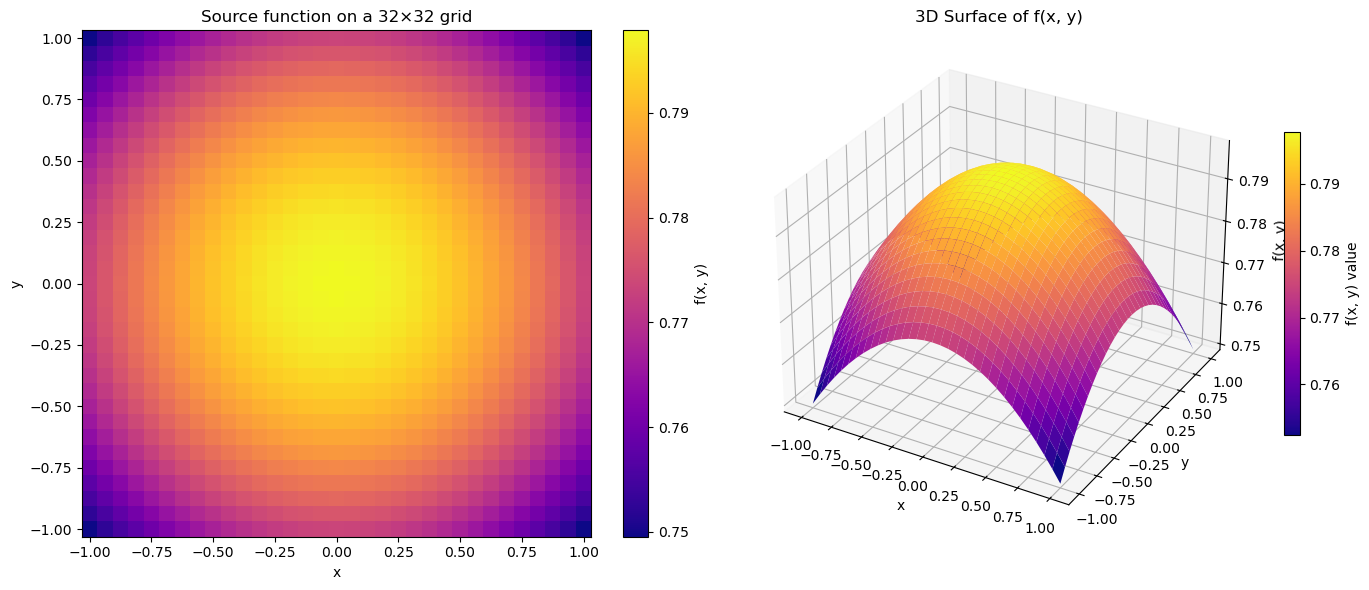

In [9]:
fig = plt.figure(figsize=(14,6)) # whilst not nessesary for the question, a plot to visualise the source function on both a 2d plane and 3d space

#subplot 1 (Left) 2d plot showing 32x32 grid
ax1 = fig.add_subplot(1, 2, 1)
pcm = ax1.pcolormesh(X, Y, source, cmap="plasma") # unfortunately the pcolormesh plot doesn't have 'levels' like the contourf plot but 
#this way shows off the 32x32 grid better
fig.colorbar(pcm, ax=ax1, label="f(x, y)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Source function on a 32×32 grid")

#subplot 2 (Right) 3d plot to visualise the function
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax2.plot_surface(X, Y, source, cmap="plasma", edgecolor='none')
fig.colorbar(surf, ax=ax2, shrink=0.6, label="f(x, y) value")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("f(x, y)")
ax2.set_title("3D Surface of f(x, y)")
plt.savefig('./plot of f(x, y)')

plt.tight_layout()
plt.show()

In [11]:
F = np.fft.fft2(source) #this is the 2d FFT function (It can do more than 2d but I don't need that functionality here)
F_shifted = np.fft.fftshift(F) # in order to plot on the 32x32 grid the FFT needs to be shifte3d to the center of the grid

In [13]:
dx = x[1] - x[0] # only works as the numpy array was created with linspace
dy = y[1] - y[0] # only works as the numpy array was created with linspace

k = np.fft.fftfreq(Npointsx, dx) # move x and y coordinates into spectral space
l = np.fft.fftfreq(Npointsy, dy)

k_shifted = np.fft.fftshift(k) # k and l need to be shifted aswell for plotting
l_shifted = np.fft.fftshift(l)
K, L = np.meshgrid(k_shifted, l_shifted) # place shifted values into another mesh

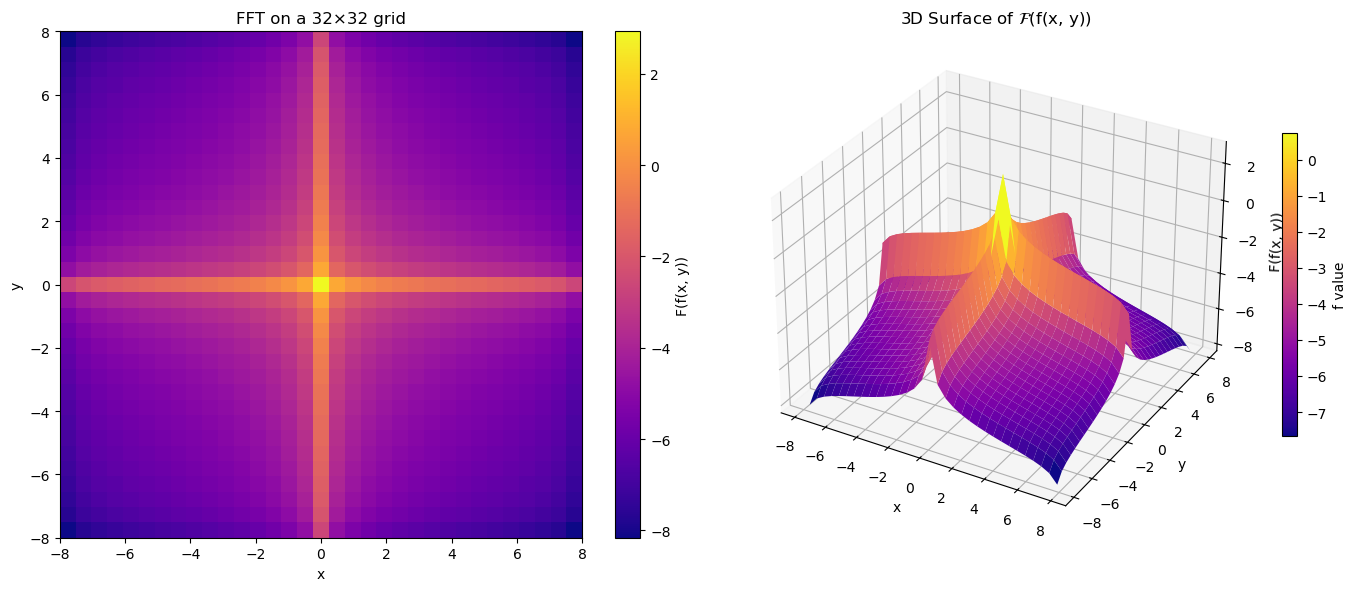

In [15]:
fig = plt.figure(figsize=(14,6))

#subplot 1 (Left)
ax1 = fig.add_subplot(1, 2, 1)
pcm = ax1.pcolormesh(K, L, np.log10(np.abs(F_shifted) + 1e-12), shading='auto', cmap="plasma")
fig.colorbar(pcm, ax=ax1, label="F(f(x, y))")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("FFT on a 32×32 grid")

#subplot 2 (Right)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax2.plot_surface(K, L, np.log10(np.abs(F_shifted) + 1e-12), cmap="plasma", edgecolor='none')
fig.colorbar(surf, ax=ax2, shrink=0.6, label="f value")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("F(f(x, y))")
ax2.set_title(r"3D Surface of $\mathcal{F}$(f(x, y))")
plt.savefig('./plot of FFT of f(x,y)')

plt.tight_layout()
plt.show()

In [19]:
F = np.fft.fft2(source)

k1, l1 = np.meshgrid(k, l)  # wanted to use K and L but also trying to avoid reusing variables

spectral_lower = (np.pi**2)*(k1**2 + l1**2) # this is the spectral form from question 1

spectral_lower[0,0]

0.0

In [35]:
spectral_lower[0, 0] = 1.0  # temporary value so the code isn't trying to divide by zero
phi_hat = -F / spectral_lower # spectral identity from question 1
phi_hat[0, 0] = 0.0 # replace the temporary value with the original

In [37]:
phi = np.fft.ifft2(phi_hat).real # ignore complex output as it can't plot properly otherwise

### Question 6

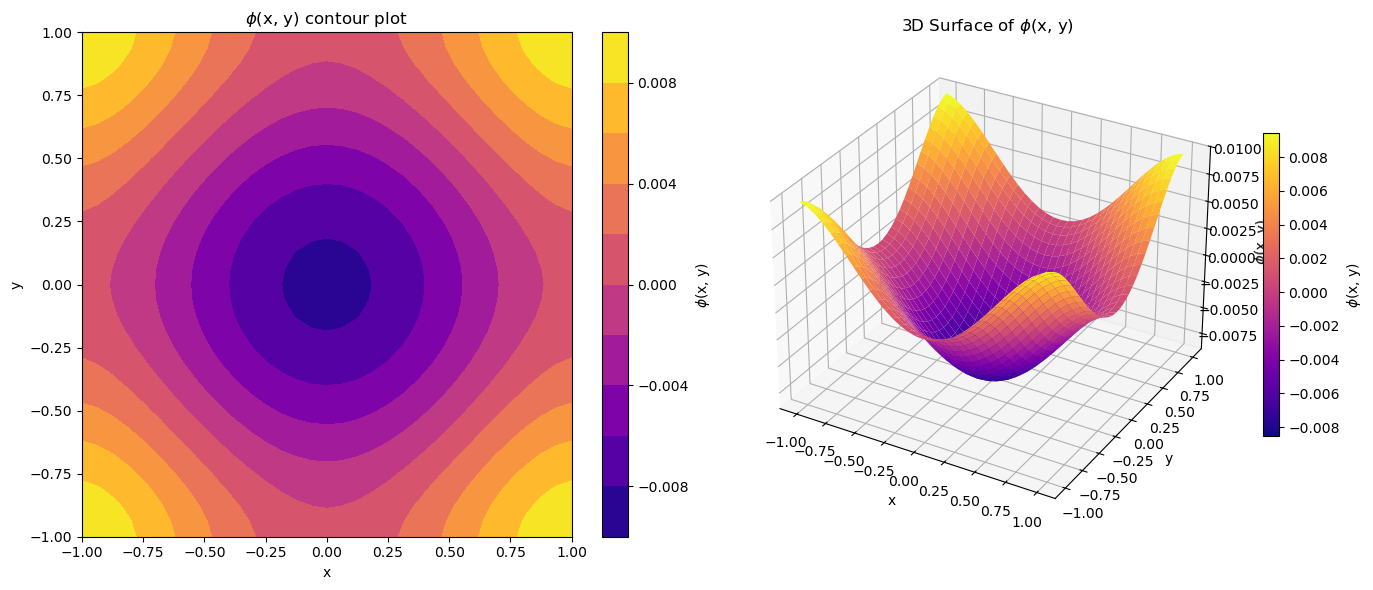

In [39]:
fig = plt.figure(figsize=(14,6))

#subplot 1 (Left)
ax1 = fig.add_subplot(1, 2, 1)
pcm = ax1.contourf(X, Y, phi, levels = 10, cmap="plasma")
fig.colorbar(pcm, ax = ax1, label = r"$\phi$(x, y)") #r gets rid of escape sequence errors something about regex
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title(r"$\phi$(x, y) contour plot")

#subplot 2 (Right)
ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
surf = ax2.plot_surface(X, Y, phi, cmap = "plasma", edgecolor='none')
fig.colorbar(surf, ax = ax2, shrink = 0.6, label = r"$\phi$(x, y)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel(r"$\phi$(x, y)")
ax2.set_title(r"3D Surface of $\phi$(x, y)")
plt.savefig('./plot of phi')

plt.tight_layout()
plt.show()

### Question 7

In [124]:
#interpolation at point (0.5, 0.5) of 32x32 grid
interp = RegularGridInterpolator((x, y), phi)
value32 = interp((0.5, 0.5))

print("Interpolated value at (0.5, 0.5):", value32)

Interpolated value at (0.5, 0.5): -0.0009398909022130568


In [126]:
#Basically repeat question 5 and 6 for 64x64 and 128x128 grid cells

Npointsx64 = 64 + 1
Npointsy64 = 64 + 1

x64 = np.linspace(-1, 1, Npointsx64)
y64 = np.linspace(-1, 1, Npointsy64)

X64, Y64 = np.meshgrid(x64, y64)

In [128]:
dx64 = x64[1] - x64[0]
dy64 = y64[1] - y64[0]

kx64 = np.fft.fftfreq(Npointsx64, dx64)
ky64 = np.fft.fftfreq(Npointsy64, dy64)

KX64, KY64 = np.meshgrid(kx64, ky64)

Z64 = (1/np.sqrt(2*np.pi*sigma))*np.exp(-((X64**2 + Y64**2)/2*sigma**2))

In [130]:
F = np.fft.fft2(Z64)

k64 = (np.pi**2)*(KX64**2 + KY64**2)

In [132]:
k64[0, 0] = 1.0  # temporary dummy value so we can divide
phi_hat_64 = -F / k64
phi_hat_64[0, 0] = 0.0

In [134]:
phi64 = np.fft.ifft2(phi_hat_64).real

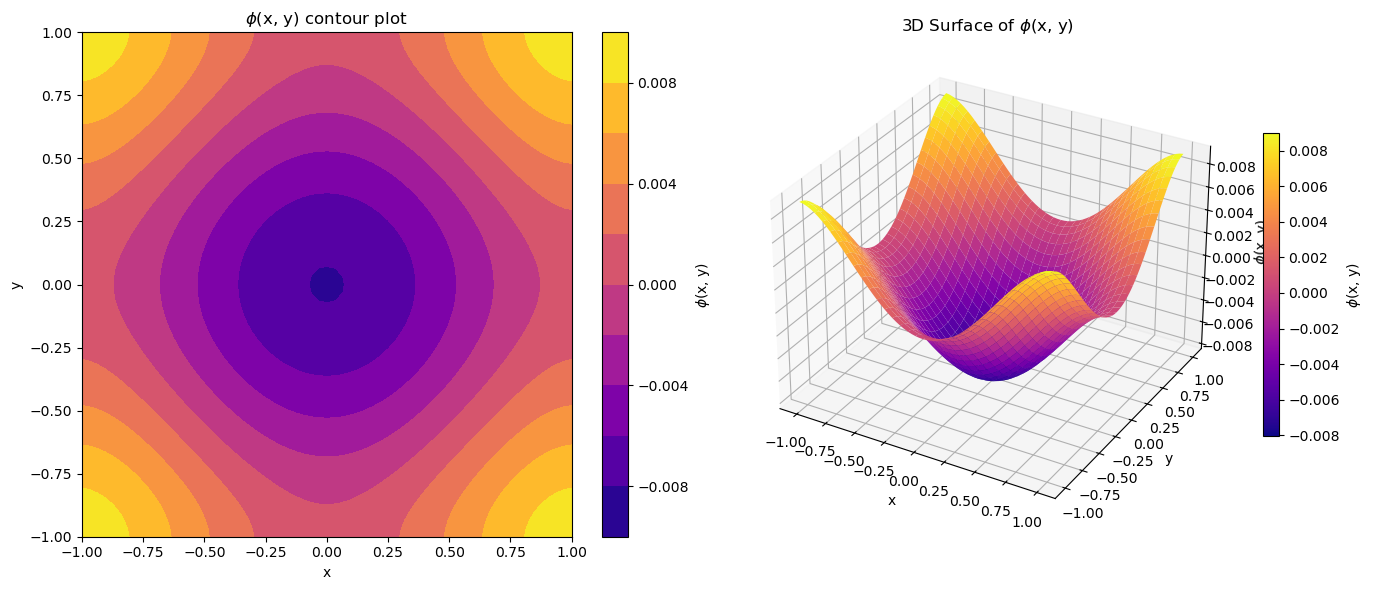

In [136]:
fig = plt.figure(figsize=(14,6))

#subplot 1 (Left)
ax1 = fig.add_subplot(1, 2, 1)
pcm = ax1.contourf(X64, Y64, phi64, levels = 10, cmap="plasma")
fig.colorbar(pcm, ax = ax1, label = r"$\phi$(x, y)") #r gets rid of excape sequence errors something about regex
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title(r"$\phi$(x, y) contour plot")

#subplot 2 (Right)
ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
surf = ax2.plot_surface(X64, Y64, phi64, cmap = "plasma", edgecolor='none')
fig.colorbar(surf, ax = ax2, shrink = 0.6, label = r"$\phi$(x, y)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel(r"$\phi$(x, y)")
ax2.set_title(r"3D Surface of $\phi$(x, y)")
plt.savefig('./plot of phi')

plt.tight_layout()
plt.show()

In [137]:
interp64 = RegularGridInterpolator((x64, y64), phi64)
value64 = interp64((0.5, 0.5))

print("Interpolated value at (0.5, 0.5):", value64)

Interpolated value at (0.5, 0.5): -0.0006953614439517055


#### 128x128 grid cells

In [141]:
Npointsx128 = 128 + 1
Npointsy128 = 128 + 1

x128 = np.linspace(-1, 1, Npointsx128)
y128 = np.linspace(-1, 1, Npointsy128)

X128, Y128 = np.meshgrid(x128, y128)

In [143]:
dx128 = x128[1] - x128[0]
dy128 = y128[1] - y128[0]

kx128 = np.fft.fftfreq(Npointsx128, dx128)
ky128 = np.fft.fftfreq(Npointsy128, dy128)

KX128, KY128 = np.meshgrid(kx128, ky128)

Z128 = (1 / np.sqrt(2 * np.pi * sigma)) * np.exp(-((X128**2 + Y128**2) / 2 * sigma**2))

In [145]:
F128 = np.fft.fft2(Z128)

k128 = (np.pi**2)*(KX128**2 + KY128**2)

In [147]:
k128[0, 0] = 1.0  # temporary dummy value so we can divide
phi_hat_128 = -F128 / k128
phi_hat_128[0, 0] = 0.0

In [149]:
phi128 = np.fft.ifft2(phi_hat_128).real

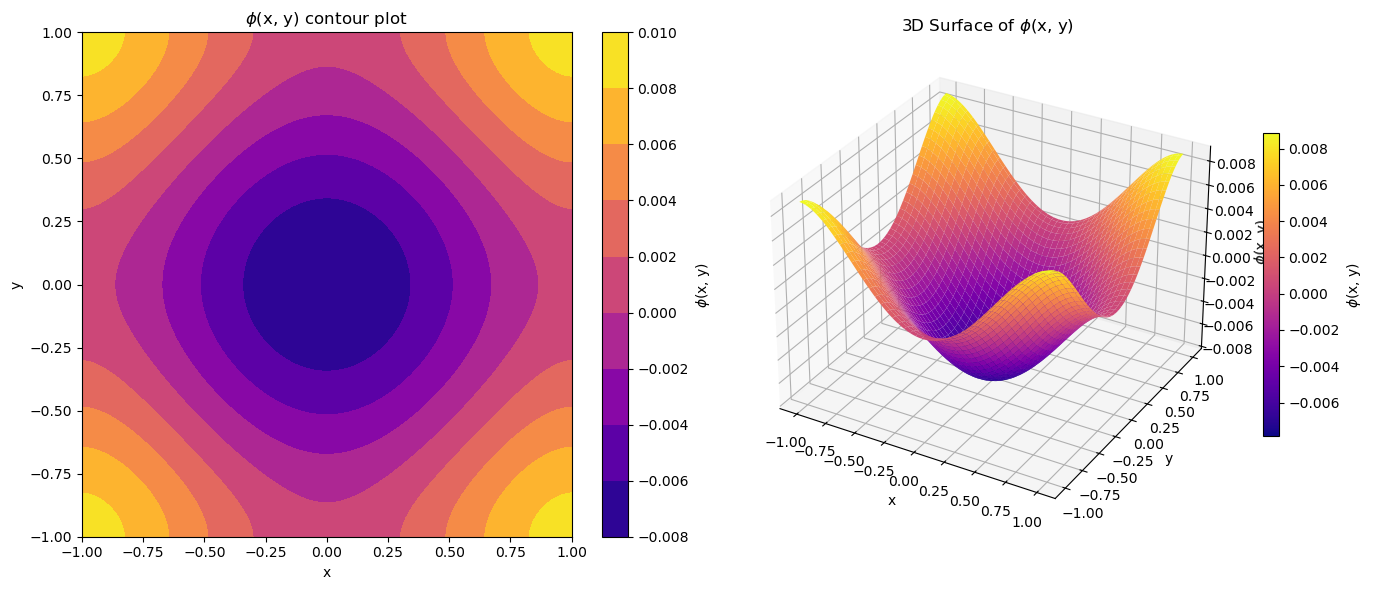

In [151]:
fig = plt.figure(figsize=(14,6))

#subplot 1 (Left)
ax1 = fig.add_subplot(1, 2, 1)
pcm = ax1.contourf(X128, Y128, phi128, levels = 10, cmap="plasma")
fig.colorbar(pcm, ax = ax1, label = r"$\phi$(x, y)") #r gets rid of excape sequence errors something about regex
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title(r"$\phi$(x, y) contour plot")

#subplot 2 (Right)
ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
surf = ax2.plot_surface(X128, Y128, phi128, cmap = "plasma", edgecolor='none')
fig.colorbar(surf, ax = ax2, shrink = 0.6, label = r"$\phi$(x, y)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel(r"$\phi$(x, y)")
ax2.set_title(r"3D Surface of $\phi$(x, y)")
plt.savefig('./plot of phi')

plt.tight_layout()
plt.show()

In [152]:
interp128 = RegularGridInterpolator((x128, y128), phi128)
value128 = interp128((0.5, 0.5))

print("Interpolated value at (0.5, 0.5):", value128)

Interpolated value at (0.5, 0.5): -0.0005794137297757478


#### 1024x1024 grid cells

In [156]:
Npointsx1024 = 1024 + 1
Npointsy1024 = 1024 + 1

x1024 = np.linspace(-1, 1, Npointsx1024)
y1024 = np.linspace(-1, 1, Npointsy1024)

X1024, Y1024 = np.meshgrid(x1024, y1024)

In [158]:
dx1024 = x1024[1] - x1024[0]
dy1024 = y1024[1] - y1024[0]

k1024 = np.fft.fftfreq(Npointsx1024, dx1024)
l1024 = np.fft.fftfreq(Npointsy1024, dy1024)

K1024, L1024 = np.meshgrid(k1024, l1024)

source_1024 = (1 / np.sqrt(2 * np.pi * sigma)) * np.exp(-((X1024**2 + Y1024**2) / 2 * sigma**2))

In [160]:
F1024 = np.fft.fft2(source_1024)

spectral_lower_1024 = (np.pi**2)*(K1024**2 + L1024**2)

In [162]:
spectral_lower_1024[0, 0] = 1.0  # temporary dummy value so we can divide
phi_hat_1024 = -F1024 / spectral_lower_1024
phi_hat_1024[0, 0] = 0.0

In [164]:
phi1024 = np.fft.ifft2(phi_hat_1024).real

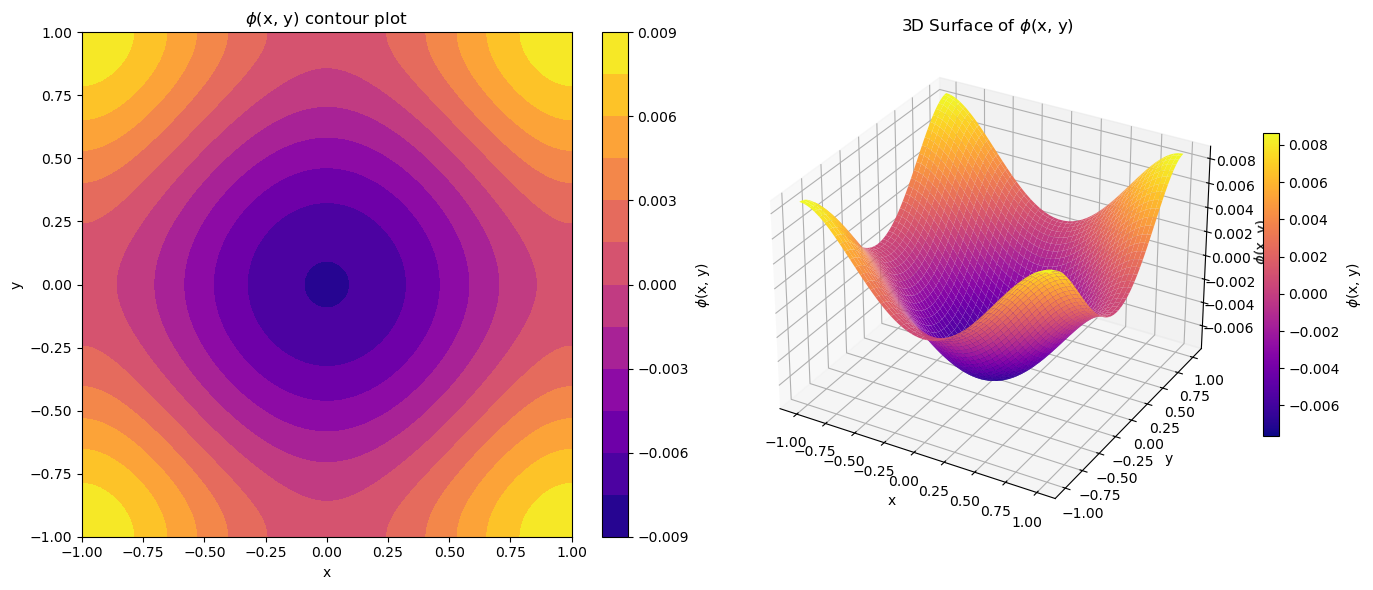

In [166]:
fig = plt.figure(figsize=(14,6))

#subplot 1 (Left)
ax1 = fig.add_subplot(1, 2, 1)
pcm = ax1.contourf(X1024, Y1024, phi1024, levels = 10, cmap="plasma")
fig.colorbar(pcm, ax = ax1, label = r"$\phi$(x, y)") #r gets rid of excape sequence errors something about regex
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title(r"$\phi$(x, y) contour plot")

#subplot 2 (Right)
ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
surf = ax2.plot_surface(X1024, Y1024, phi1024, cmap = "plasma", edgecolor='none')
fig.colorbar(surf, ax = ax2, shrink = 0.6, label = r"$\phi$(x, y)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel(r"$\phi$(x, y)")
ax2.set_title(r"3D Surface of $\phi$(x, y)")
plt.savefig('./plot of phi')

plt.tight_layout()
plt.show()

In [168]:
interp1024 = RegularGridInterpolator((x1024, y1024), phi1024)
value1024 = interp1024((0.5, 0.5))

print("Interpolated value at (0.5, 0.5):", value1024)

Interpolated value at (0.5, 0.5): -0.0004813946877682037


##### Relative error

In [181]:
x_0 = np.array((value32, value64, value128, value1024))
x = value1024
relative_error = ((x_0 / x) - 1)*100

relative_error # as a percentage

array([95.24330577, 44.4472616 , 20.36147147,  0.        ])

### Question 8

In [55]:
Npointsx = 32 + 1 # To have 32 cells, I need 33 grid points so the boundaries are included
Npointsy = 32 + 1

x = np.linspace(-1, 1, Npointsx) #generate x and y arrays
y = np.linspace(-1, 1, Npointsy)

X, Y = np.meshgrid(x, y) # create a 2d mesh using the x and y points

In [57]:
source2 = np.sin(np.pi*X)*np.cos(np.pi*X)

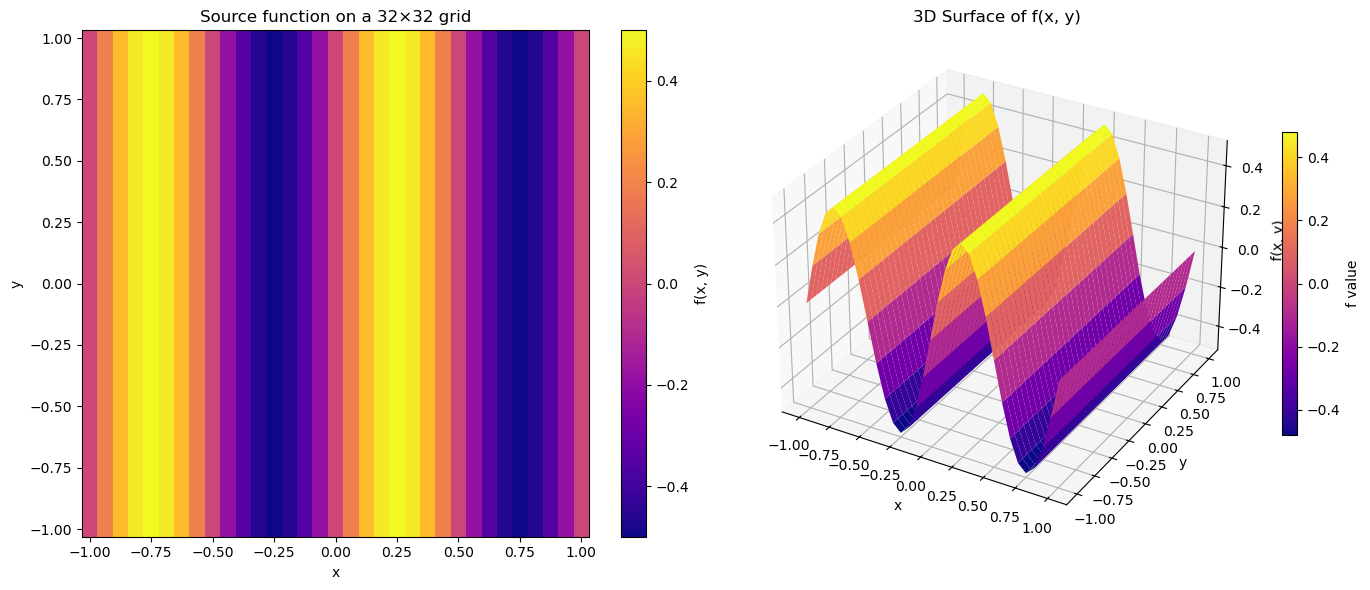

In [59]:
fig = plt.figure(figsize=(14,6))

#subplot 1 (Left)
ax1 = fig.add_subplot(1, 2, 1)
pcm = ax1.pcolormesh(X, Y, source2, shading='auto', cmap="plasma")
fig.colorbar(pcm, ax=ax1, label="f(x, y)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Source function on a 32×32 grid")

#subplot 2 (Right)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax2.plot_surface(X, Y, Z8, cmap="plasma", edgecolor='none')
fig.colorbar(surf, ax=ax2, shrink=0.6, label="f value")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("f(x, y)")
ax2.set_title("3D Surface of f(x, y)")

plt.tight_layout()
plt.show()

In [63]:
F2 = np.fft.fft2(source2)

dx = x[1] - x[0] # only works as the numpy array was created with linspace
dy = y[1] - y[0] # only works as the numpy array was created with linspace

k = np.fft.fftfreq(Npointsx, dx) # move x and y coordinates into spectral space
l = np.fft.fftfreq(Npointsy, dy)

In [75]:
k2, l2 = np.meshgrid(k, l)

spectral_lower = (np.pi**2)*(k2**2 + l2**2)

spectral_lower[0, 0]

0.0

In [77]:
spectral_lower[0, 0] = 1.0  # temporary dummy value so we can divide
phi8_hat = -F2 / spectral_lower
phi8_hat[0, 0] = 0.0

In [79]:
phi8 = np.fft.ifft2(phi8_hat).real

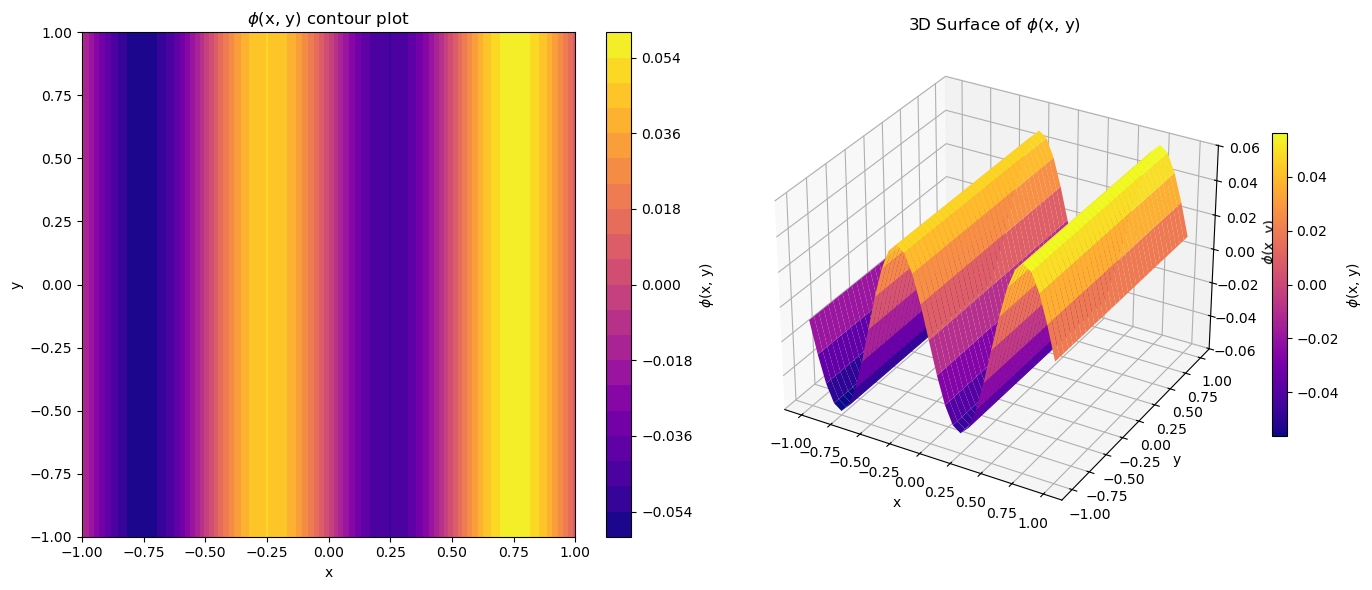

In [83]:
fig = plt.figure(figsize=(14,6))

#subplot 1 (Left)
ax1 = fig.add_subplot(1, 2, 1)
pcm = ax1.contourf(X, Y, phi8, levels = 20, cmap="plasma") # increased the number of levels as the vales vary a lot
fig.colorbar(pcm, ax = ax1, label = r"$\phi$(x, y)") #r gets rid of escape sequence errors something about regex
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title(r"$\phi$(x, y) contour plot")

#subplot 2 (Right)
ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
surf = ax2.plot_surface(X, Y, phi8, cmap = "plasma", edgecolor='none')
fig.colorbar(surf, ax = ax2, shrink = 0.6, label = r"$\phi$(x, y)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel(r"$\phi$(x, y)")
ax2.set_title(r"3D Surface of $\phi$(x, y)")

plt.tight_layout()
plt.show()